In [77]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from glob import glob

In [80]:
driver = webdriver.Chrome('./chromedriver')
driver.get('http://www.opinet.co.kr/user/main/mainView.do')
driver.maximize_window()
driver.find_element_by_css_selector('.ic_m1').click()

In [62]:
driver.find_element_by_xpath('//*[@id="SIDO_NM0"]').send_keys('서울')   
driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]').send_keys('강서구')   #구 리스트 열기
# driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]/option[5]').click() # 강서구 선택하기
driver.find_element_by_xpath('//*[@id="DONG_NM"]').send_keys('화곡제6동') # 동 리스트열기
# driver.find_element_by_xpath('//*[@id="DONG_NM"]/option[32]').click()# 화곡6동 선택하기
driver.find_element_by_xpath('//*[@id="VLT_YN"]').click() # 불법 체크아웃
if driver.find_element_by_xpath('//*[@id="VLT_YN"]').is_selected():
    driver.find_element_by_xpath('//*[@id="VLT_YN"]').click()
driver.find_element_by_xpath('//*[@id="searRgSelect"]/span').click() # 조회누르기


In [81]:
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_tag_name('option')
gu_names = [gu.get_attribute('value') for gu in gu_list][1:]
# gu_names = []
# for gu in gu_list:
#     name = gu.get_attribute('value')
#     gu_names.append(name)

In [83]:
for gu in tqdm_notebook(gu_names):
    driver.find_element_by_xpath('//*[@id="SIDO_NM0"]').send_keys('서울') 
    driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]').send_keys(gu) 
    driver.find_element_by_xpath('//*[@id="searRgSelect"]/span').click()
    time.sleep(2)
    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [97]:
driver.close()

### 구별 휘발류 가격에 대한 데이터 정리

In [105]:
stations_files = glob('./station_data/지역*.xls')
stations_files

['./station_data\\지역_위치별(주유소) (1).xls',
 './station_data\\지역_위치별(주유소) (10).xls',
 './station_data\\지역_위치별(주유소) (11).xls',
 './station_data\\지역_위치별(주유소) (12).xls',
 './station_data\\지역_위치별(주유소) (13).xls',
 './station_data\\지역_위치별(주유소) (14).xls',
 './station_data\\지역_위치별(주유소) (15).xls',
 './station_data\\지역_위치별(주유소) (16).xls',
 './station_data\\지역_위치별(주유소) (17).xls',
 './station_data\\지역_위치별(주유소) (18).xls',
 './station_data\\지역_위치별(주유소) (19).xls',
 './station_data\\지역_위치별(주유소) (2).xls',
 './station_data\\지역_위치별(주유소) (20).xls',
 './station_data\\지역_위치별(주유소) (21).xls',
 './station_data\\지역_위치별(주유소) (22).xls',
 './station_data\\지역_위치별(주유소) (23).xls',
 './station_data\\지역_위치별(주유소) (24).xls',
 './station_data\\지역_위치별(주유소) (3).xls',
 './station_data\\지역_위치별(주유소) (4).xls',
 './station_data\\지역_위치별(주유소) (5).xls',
 './station_data\\지역_위치별(주유소) (6).xls',
 './station_data\\지역_위치별(주유소) (7).xls',
 './station_data\\지역_위치별(주유소) (8).xls',
 './station_data\\지역_위치별(주유소) (9).xls',
 './station_data\\지역_위치별(

In [116]:
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)
station_raw
    


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1374,1187,-
1,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1585,1385,1188,1000
2,서울특별시,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,현대오일뱅크,02-487-2030,Y,1598,1386,1188,895
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1395,1195,975
4,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1625,1395,1198,-
...,...,...,...,...,...,...,...,...,...,...
35,서울특별시,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2037,1883,1659,1100
36,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2079,1913,1689,1359
37,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2330,2025,1865,1260
38,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [115]:
stations = pd.DataFrame({
                        'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']
})
stations

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1374,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1385,N,GS칼텍스
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1386,Y,현대오일뱅크
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1395,Y,SK에너지
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1395,Y,현대오일뱅크
...,...,...,...,...,...
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1883,N,GS칼텍스
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1913,N,GS칼텍스
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지


In [120]:
stations['구'] = [addr.split()[1] for addr in stations['주소']]
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [126]:
stations = stations[stations['가격'] != '-']
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1374,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1385,N,GS칼텍스,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1386,Y,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1395,Y,SK에너지,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1395,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1883,N,GS칼텍스,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1913,N,GS칼텍스,강남구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),NaN,N,SK에너지,강남구


In [128]:
stations['가격'] = pd.to_numeric(stations['가격'])
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1374.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1385.0,N,GS칼텍스,강동구
2,현대오일뱅크㈜직영 고속셀프주유소,서울 강동구 천호대로 1246,1386.0,Y,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1395.0,Y,SK에너지,강동구
4,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1395.0,Y,현대오일뱅크,강동구
...,...,...,...,...,...,...
35,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1883.0,N,GS칼텍스,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1913.0,N,GS칼텍스,강남구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),NaN,N,SK에너지,강남구


### 셀프주유소가 정말 저렴한지 Boxplot 으로 확인하기

In [129]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

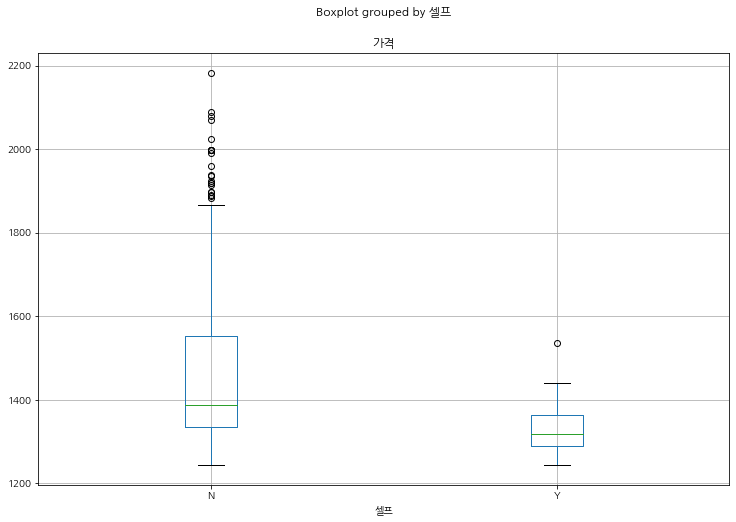

In [131]:
stations.boxplot(column='가격',by='셀프',figsize=(12,8))
plt.show()

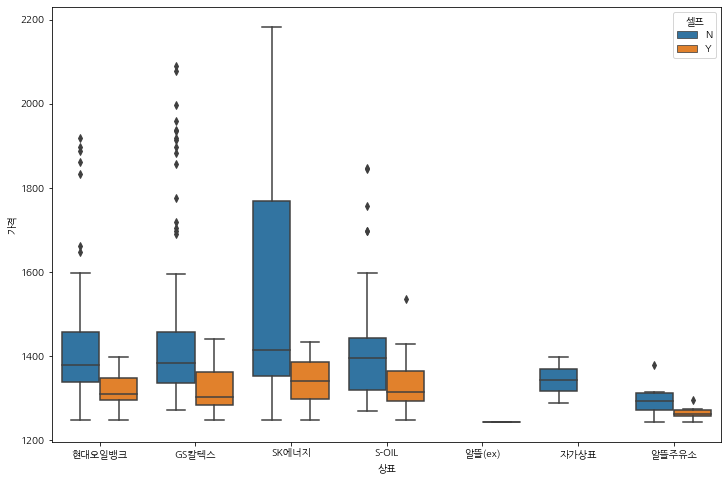

In [140]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',hue='셀프',data=stations)
plt.show()

### 서울시 구별 휘발유 가격 확인하기

In [162]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [154]:
# 휘발유 가격이 비싼 주유소 top 10
stations.sort_values(by='가격',ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2183.0,N,SK에너지,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2089.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2079.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2069.0,N,SK에너지,중구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
12,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구
11,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
10,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990.0,N,SK에너지,용산구


In [155]:
# 휘발유 가격이 저렴한 주유소 top 10
stations.sort_values(by='가격').head(10)

,Oil_store,주소,가격,셀프,상표,구
0,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1243.0,Y,알뜰주유소,강서구
1,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1243.0,N,알뜰주유소,강서구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1244.0,Y,알뜰(ex),서초구
1,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1249.0,Y,SK에너지,도봉구
3,현대주유소,서울 양천구 남부순환로 372 (신월동),1249.0,Y,S-OIL,양천구
2,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1249.0,N,SK에너지,양천구
1,형산석유(주)원주유소,서울 양천구 남부순환로 408,1249.0,N,현대오일뱅크,양천구
0,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1249.0,Y,SK에너지,양천구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1249.0,Y,현대오일뱅크,강북구
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1249.0,N,현대오일뱅크,도봉구


In [160]:
gu_data = pd.pivot_table(stations,index='구',values='가격',aggfunc=np.mean)
_data = pd.pivot_table(stations,index='구',values='가격',aggfunc=np.mean)
gu_data.sort_values(by='가격').head(10)

,가격
구,
강북구,1281.153846
성북구,1290.416667
중랑구,1301.875000
금천구,1304.461538
도봉구,1314.777778
은평구,1326.437500
서대문구,1334.666667
양천구,1335.153846
동대문구,1337.190476


In [285]:
geo_path = './station_data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start = 10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_data,
                data = gu_data,
                columns=[gu_data.index,'가격'],
                fill_color='PuRd',
                key_on='feature.id')
map

In [239]:
stations2 = stations

In [240]:
import requests
from urllib.parse import urlparse, quote
import pandas as pd
key_fd = open('../06.restAPI/kakaomapkey.txt')
kmap_key = key_fd.read(100)
key_fd.close()

In [256]:
url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + stations2['주소'][52]
result = requests.get(urlparse(url).geturl(), headers={"Authorization":"KakaoAK "+ kmap_key}).json()
address = result
address
# result = requests.get(urlparse(url).geturl(), headers={"Authorization":"KakaoAK "+ kmap_key}).json()

{'documents': [],
 'meta': {'is_end': True, 'pageable_count': 0, 'total_count': 0}}

In [270]:
stations2['주소'][52]

'서울 마포구 대흥로 61 (대흥동)'

In [273]:
url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + '서울 마포구 대흥로 61'
result = requests.get(urlparse(url).geturl(), headers={"Authorization":"KakaoAK "+ kmap_key}).json()
address = result
address

{'documents': [],
 'meta': {'is_end': True, 'pageable_count': 0, 'total_count': 0}}

In [274]:
lat_list=[]
lng_list=[]
for i in stations2.index:
    try:
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + stations2['주소'][i]
        result = requests.get(urlparse(url).geturl(), headers={"Authorization":"KakaoAK "+ kmap_key}).json()
        address = result['documents'][0]['address']
        lng = address['x'] 
        lat = address['y']
        lng_list.append(lng)
        lat_list.append(lat)
    except:
        print(i)
        lng_list.append('-')
        lat_list.append('-')

52
161
235


In [275]:
stations2['lng'] = lng_list
stations2['lat'] = lat_list

In [279]:
stations2 = stations2[stations2['lng'] != '-']
stations2['주소'][51]

'서울 마포구 백범로 126 (염리동)'

In [296]:
stations2.sort_values(by='가격')

,index,Oil_store,주소,가격,셀프,상표,구,lng,lat
325,1,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1243.0,N,알뜰주유소,강서구,126.856035365887,37.5315624983884
324,0,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1243.0,Y,알뜰주유소,강서구,126.8414715329,37.5407680113225
76,0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1244.0,Y,알뜰(ex),서초구,127.042624862658,37.4596446385464
189,3,현대주유소,서울 양천구 남부순환로 372 (신월동),1249.0,Y,S-OIL,양천구,126.829178494291,37.5339097605129
188,2,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1249.0,N,SK에너지,양천구,126.834298807985,37.5370203692233
...,...,...,...,...,...,...,...,...,...
287,16,삼융주유소,서울 은평구 수색로 299 (수색동),NaN,N,SK에너지,은평구,126.891088859421,37.5839915532482
307,10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,NaN,N,GS칼텍스,중구,126.974511796533,37.5570465768548
439,14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),NaN,N,SK에너지,노원구,127.066635239734,37.6560120786901
496,38,삼성주유소,서울 강남구 삼성로 521 (삼성동),NaN,N,SK에너지,강남구,127.055237920869,37.5085638143441


In [282]:
mapping = folium.Map(location=[37.5502, 126.982],zoom_start=10.5)
for i in stations2.index:
    folium.Marker([float(stations2.lat[i]),float(stations2.lng[i])],
                   popup=stations2.Oil_store[i] ).add_to(mapping)
mapping

In [295]:
geo_path = './station_data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))
top_10 = stations2.sort_values(by='가격',ascending=False).head(10)
bot_10 = stations2.sort_values(by='가격',ascending=True).head(10)
# print(top_10)
# map = folium.Map(location=[37.5502, 126.982], zoom_start = 10.5, tiles='Stamen Toner')
# map = folium.Map(location=[37.5502, 126.982],zoom_start=10.5, tiles='Stamen Toner')
map = folium.Map(location=[37.5502, 126.982],zoom_start=10.5)
for i in top_10.index:
    folium.Marker([float(top_10.lat[i]),float(top_10.lng[i])],
                   popup=top_10.Oil_store[i],
                   tooltip=top_10["가격"][i],
                   icon=folium.Icon(color = 'blue')  ).add_to(map)
for i in bot_10.index:
    folium.Marker([float(bot_10.lat[i]),float(bot_10.lng[i])],
                   popup=bot_10.Oil_store[i],
                   tooltip=bot_10["가격"][i],
                   icon=folium.Icon(color = 'red') ).add_to(map)

map.choropleth(geo_data = geo_data,
                data = gu_data,
                columns=[gu_data.index,'가격'],
                fill_color='PuRd',
                key_on='feature.id')
map